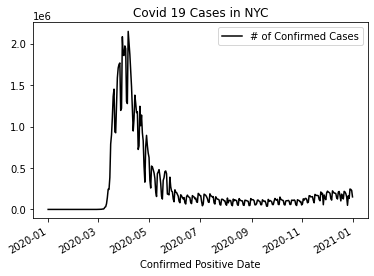

In [7]:
# Covid-19 Impact on Economy jupyter notebook
# Author: Andy Juan
# Date: 2020-05-05
# Course: CS-GY 6513 Big Data
# Project: Course Project
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# Constants
twenty19_start_date = pd.to_datetime("01/01/2019")
twenty19_end_date = pd.to_datetime("12/31/2019")
twenty20_start_date = pd.to_datetime("01/01/2020")
twenty20_end_date = pd.to_datetime("12/31/2020")
artifact_path = "../artifacts/economic/"
dataset_path = "../datasets/economic_data/"

### Confirmed Covid cases data ###
# Read csv file that has data for positive cases for 2020
# Specimen_date column will be used to represent confirmed positive cases.
dtypes = {'extract_date': 'object', 'specimen_date': 'object', 
          'Number_tested': 'int64', 'Number_confirmed': 'int64',
          'Number_hospitalized': 'int64', 'Number_deaths': 'int64'}
covid_data_df = pd.read_csv("../datasets/covid_positive_and_deaths.csv", dtype=dtypes)

# Cast column type to pandas datetime type
# Replace invalid dates with NAT and drop all rows with NA values
covid_data_df['extract_date'] = pd.to_datetime(covid_data_df['extract_date'], errors='coerce')
covid_data_df['specimen_date'] = pd.to_datetime(covid_data_df['specimen_date'], errors='coerce')
covid_data_df = covid_data_df.dropna()

# Sort by date and filter for 2020
covid_data_df = covid_data_df.sort_values(by=['specimen_date'], ascending=True)
twenty20_df = covid_data_df[
    (covid_data_df["specimen_date"] >= twenty20_start_date) & 
    (covid_data_df["specimen_date"] <= twenty20_end_date)
]
# Group by date
twenty20_positive_df = twenty20_df.groupby(["specimen_date"], as_index=True).sum().reset_index()
ax = twenty20_positive_df.plot.line(x='specimen_date',
                                    y='Number_confirmed',
                                    color="Black",
                                    label="# of Confirmed Cases",
                                    title="Covid 19 Cases in NYC")
ax.set_xlabel("Confirmed Positive Date")
fig = ax.get_figure()
fig.savefig(artifact_path + 'nyc_covid_cases_2020.png')

10 largest percent diff: 0.6082921416322001


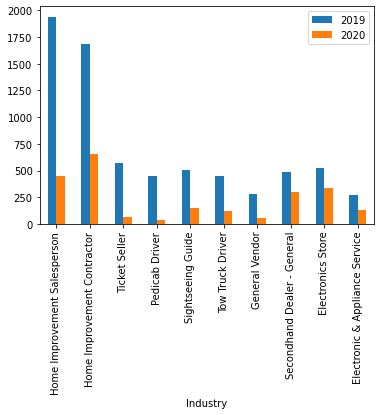

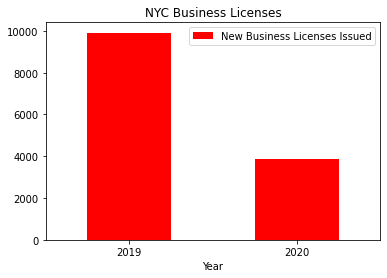

In [8]:
### NYC legally operating businesses ###
nyc_business_df = pd.read_csv(dataset_path + "Legally_Operating_Businesses.csv", low_memory=False)
# Cast date columsn to pandas datetime type
nyc_business_df['License Expiration Date'] = pd.to_datetime(nyc_business_df['License Expiration Date'], 
                                                            errors='coerce')
nyc_business_df['License Creation Date'] = pd.to_datetime(nyc_business_df['License Creation Date'], 
                                                          errors='coerce')
# Get the businesses that were created in 2019
nyc_19_new_bus_df = nyc_business_df[(nyc_business_df["License Creation Date"] >= twenty19_start_date) &
                                    (nyc_business_df["License Creation Date"] <= twenty19_end_date)]
nyc_19_new_bus_df = nyc_19_new_bus_df.sort_values(by=['License Creation Date'], ascending=True)
# Groupby industries and order
nyc_19_industry_df = nyc_19_new_bus_df.groupby(['Industry']).size().reset_index(name='counts')
nyc_19_industry_df = nyc_19_industry_df.sort_values(by=['counts']).reset_index(drop=True)
nyc_19_industry_count = nyc_19_industry_df['counts'].sum()

# Get the businesses that were created in 2020
nyc_20_new_bus_df = nyc_business_df[(nyc_business_df["License Creation Date"] >= twenty20_start_date) &
                                    (nyc_business_df["License Creation Date"] <= twenty20_end_date)]
nyc_20_new_bus_df= nyc_20_new_bus_df.sort_values(by=['License Creation Date'], ascending=True)
# Groupby industries and order
nyc_20_industry_df = nyc_20_new_bus_df.groupby(['Industry']).size().reset_index(name='counts')
nyc_20_industry_df = nyc_20_industry_df.sort_values(by=['counts']).reset_index(drop=True)
nyc_20_industry_df.columns = ['Industry', 'counts_20']


# Calculate the difference between the two years
ind_join = nyc_19_industry_df.set_index('Industry').join(nyc_20_industry_df.set_index('Industry'))
ind_join["count_diff"] = ind_join["counts"] - ind_join["counts_20"]
# Difference as percent of 2019
ind_join["diff_percent"] = ind_join["count_diff"] / ind_join["counts"]
# Get the 10 largest differences
ten_largest_diff = ind_join.nlargest(10, 'count_diff')
ten_largest_diff = ten_largest_diff[['counts','counts_20']]
ten_largest_diff.columns = ['2019', '2020']
# Plot 10 largest

ax = ten_largest_diff.plot.bar(rot=0)
plt.xticks(rotation=90)
fig = ax.get_figure()
fig.savefig(artifact_path + 'top_10_largest_affected_NYC_industries.png')

# Percentage of the 10 largest differences compareted to 2019
# print("count_diff sum:", ind_join['count_diff'].sum())
print("10 largest percent diff:", ind_join['count_diff'].sum() / nyc_19_industry_count)

# plot
nyc_bus_plot_data = [len(nyc_19_new_bus_df), len(nyc_20_new_bus_df)]
nyc_bus_plot_df = pd.DataFrame({'Year':['2019', '2020'], 'New Business Licenses Issued': nyc_bus_plot_data})
ax = nyc_bus_plot_df.plot.bar(x='Year', 
                              y='New Business Licenses Issued', 
                              color='red', 
                              rot=0,
                              title='NYC Business Licenses')
fig = ax.get_figure()
fig.savefig(artifact_path + 'nyc_new_business_2020.png')

file: Dow_Jones_Industrial_Average_Historical_Data.csv
file: IWB_Historical_Data.csv
file: IWM_Historical_Data.csv
file: Nasdaq_100_Historical_Data.csv
file: NYSE_Composite_Historical_Data.csv
file: SPY_Historical_Data.csv


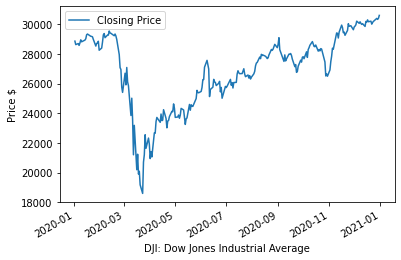

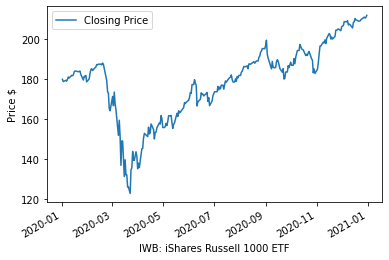

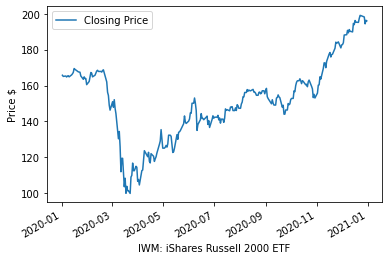

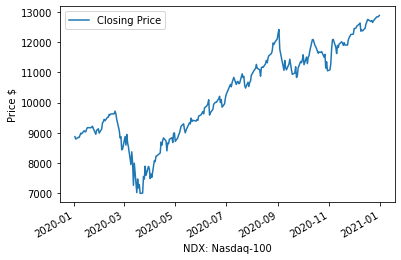

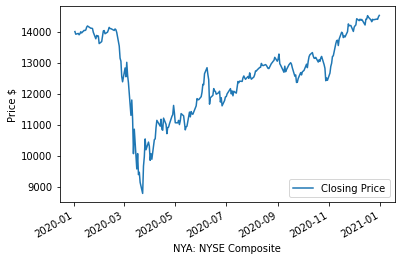

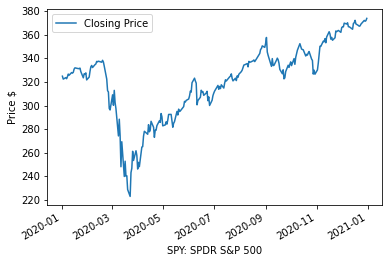

In [9]:
### SPY 2020 Closing prices ###
# CSV file retreived from investing.com
index_files = [
    {
        "symbol": "DJI",
        "description" : "Dow Jones Industrial Average",
        "filename" : "Dow_Jones_Industrial_Average_Historical_Data.csv"
    },
    {
        "symbol" : "IWB",
        "description" : "iShares Russell 1000 ETF",
        "filename" : "IWB_Historical_Data.csv"
    },
    {
        "symbol" : "IWM",
        "description" : "iShares Russell 2000 ETF",
        "filename" : "IWM_Historical_Data.csv"
    },
    {
        "symbol" : "NDX",
        "description" : "Nasdaq-100", 
        "filename" : "Nasdaq_100_Historical_Data.csv"
    },
    {
        "symbol": "NYA",
        "description" : "NYSE Composite",
        "filename" : "NYSE_Composite_Historical_Data.csv"
    },
    {
        "symbol" : "SPY",
        "description" : "SPDR S&P 500",
        "filename" : "SPY_Historical_Data.csv"
    }
]

def plot_index_close_price(sym, desc, filename):
    print ("file:", filename)
    index_md_2020_rev_df = pd.read_csv(dataset_path + filename)
    # Reverse the dataframe so that it is in ascending chronological order
    index_md_2020_df = index_md_2020_rev_df.loc[::-1].reset_index(drop=True)
    # Set the datetime data type
    index_md_2020_df['Date_Adj'] = pd.to_datetime(index_md_2020_df.Date)

    # Remove commas from price
    index_md_2020_df['Price'] = index_md_2020_df['Price'].replace(',','', regex=True)
    index_md_2020_df['Price'] = index_md_2020_df['Price'].apply(pd.to_numeric)
    
    # Plot dataframe
    ax = index_md_2020_df.plot.line(x='Date_Adj', y='Price', label='Closing Price')
    ax.set_xlabel(sym + ": " + desc)
    ax.set_ylabel("Price $")
    fig = ax.get_figure()
    fig.savefig(artifact_path + sym + '_2020.png')

for index_map in index_files:
    symbol = index_map["symbol"]
    desc = index_map["description"]
    fname = index_map["filename"]
    plot_index_close_price(symbol, desc, fname)

file: Dow_Jones_Industrial_Average_Historical_Data.csv
file: IWB_Historical_Data.csv
file: IWM_Historical_Data.csv
file: Nasdaq_100_Historical_Data.csv
file: NYSE_Composite_Historical_Data.csv
file: SPY_Historical_Data.csv


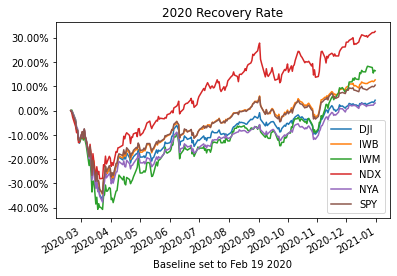

In [10]:
### US Indexes & ETFs 2020 Performance ###

def gen_md_df_percentage(filename):
    print ("file:", filename)
    md_2020_rev_df = pd.read_csv(dataset_path + filename)
    # Reverse the dataframe so that it is in ascending chronological order
    md_2020_df = md_2020_rev_df.loc[::-1].reset_index(drop=True)
    # Set the datetime data type
    md_2020_df['Date_Adj'] = pd.to_datetime(md_2020_df.Date)

    # Remove commas from price
    md_2020_df['Price'] = md_2020_df['Price'].replace(',','', regex=True)
    md_2020_df['Price'] = md_2020_df['Price'].apply(pd.to_numeric)

    # Find the row for the date of interest. Set the closing price as the baseline price
    baseline_date_str = 'Feb 19, 2020'
    md_baseline_close = md_2020_df.loc[md_2020_df['Date'] == baseline_date_str]["Price"]
    baseline_close_idx = md_baseline_close.index
    baseline_close_idx_int = baseline_close_idx.values[0]
    baseline_close_val = md_baseline_close.values[0]

    # Calculate the return
    md_2020_df["c_per"] = (md_2020_df['Price'] / baseline_close_val) - 1.0
    md_z = md_2020_df[baseline_close_idx_int:]
    return md_z



df_map = {}
for index_map in index_files:
    symbol = index_map["symbol"]
    desc = index_map["description"]
    fname = index_map["filename"]
    md_df = gen_md_df_percentage(fname)
    df_map[symbol] = md_df

ax = plt.gca()
for key in df_map:
    df = df_map[key]
    df.plot(kind='line',x='Date_Adj',y='c_per',label=key,ax=ax,title="2020 Recovery Rate")

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_xlabel("Baseline set to Feb 19 2020")

fig = ax.get_figure()
fig.savefig(artifact_path + 'market_percentage_plot.png')